# Data Preprocessing

Data source: [KAGGLE](https://www.kaggle.com/datasets/rafunlearnhub/recruitment-data)

In [1]:
!pip install mglearn
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import warnings
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
df = pd.read_csv("recruitment_decision_tree.csv")

Data Description:
This dataset contains recruitment-related data for 614 candidates and final recruitment outcomes. It is a mix of categorical and numerical variables:

**Serial_no**: A unique identifier for each record.

**Gender**: Gender of the candidate.

**Python_exp**: Whether the candidate has Python experience (Categorical - Binary).

**Experience_Years**: Years of professional experience.

**Education**: Educational qualification (Categorical).

**Internship**: Whether the candidate has internship experience (Categorical - Binary).

**Score**: A performance or aptitude score.

**Salary** * 10E4: Salary expectation or offer.

**Offer_History**: Number of previous offers.

**Location**: Candidate's location (Categorical - Binary).

**Recruitment_Status**: Final recruitment status (Categorical - Binary).

In [3]:
#Data Exploration
def data_exploration(df):
  if df.isnull().values.any()==True:
    missing_values_dict = df.isnull().sum()[df.isnull().sum() > 0].to_dict()
    print(f"There are missing values in columns: {missing_values_dict}")
    print()
  else: print("There are no missing values in dataset.")
  print(f"\n {df.info()}")
  print()
  print(f"\n {df.head()}")
  print()
  print(f"\n {df.describe()}")


In [4]:
data_exploration(df)

There are missing values in columns: {'Gender': 13, 'Python_exp': 3, 'Experience_Years': 15, 'Internship': 32, 'Salary * 10E4': 21, 'Offer_History': 50}

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Serial_no           614 non-null    int64  
 1   Gender              601 non-null    object 
 2   Python_exp          611 non-null    object 
 3   Experience_Years    599 non-null    float64
 4   Education           614 non-null    object 
 5   Internship          582 non-null    object 
 6   Score               614 non-null    int64  
 7   Salary * 10E4       593 non-null    float64
 8   Offer_History       564 non-null    float64
 9   Location            614 non-null    object 
 10  Recruitment_Status  614 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 52.9+ KB

 None


    Serial_no Gender Python_exp 

The dataset contains 614 entries across 11 columns, with a mix of numeric and categorical data types. Among these, five columns are numeric, while six are categorical. Notably, some columns have missing values, including **Gender** (13 missing entries), **Python_exp** (3 missing), **Experience_Years** (15 missing), **Internship** (32 missing),  **Salary * 10E4** (21 missing), and **Offer_History** (50 missing).

A preview of the dataset shows details such as unique identifiers (Serial_no), demographic information (Gender), technical skills (Python_exp), professional experience (Experience_Years), educational background (Education), internship experience, performance metrics (Score), salary expectations (Salary * 10E4), offer history, location, and final recruitment status.

The statistical summary reveals key insights about the numeric columns. For instance, candidates have an average of 0.76 years of experience, with a standard deviation of 1.01 years. The performance scores have a mean of 5402.33, with notable variation (standard deviation of 2169.04). Salary expectations average at 146.17 (in the scaled unit of 10E4), with a standard deviation of 85.72. Additionally, candidates have, on average, 0.84 prior job offers, with minimal variation. Percentile values and the range of each numeric column are also highlighted, providing further context for understanding the dataset.

In [5]:
data = df.dropna()  # Drop rows with missing values
data_encoded = pd.get_dummies(data.drop(columns=["Serial_no", "Recruitment_Status"]))  # Encode categorical features

data_exploration(data_encoded)
print("\nNumber of sample per status:\n{}".format(data['Recruitment_Status'].value_counts().to_dict()))

# Prepare target and features
X = data_encoded
y = data["Recruitment_Status"].map({"Y": 1, "N": 0})  # Encode target variable


smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced
)


balanced_distribution = Counter(y_balanced)
balanced_distribution



There are no missing values in dataset.
<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Experience_Years        493 non-null    float64
 1   Score                   493 non-null    int64  
 2   Salary * 10E4           493 non-null    float64
 3   Offer_History           493 non-null    float64
 4   Gender_Female           493 non-null    bool   
 5   Gender_Male             493 non-null    bool   
 6   Python_exp_No           493 non-null    bool   
 7   Python_exp_Yes          493 non-null    bool   
 8   Education_Graduate      493 non-null    bool   
 9   Education_Not Graduate  493 non-null    bool   
 10  Internship_No           493 non-null    bool   
 11  Internship_Yes          493 non-null    bool   
 12  Location_Rural          493 non-null    bool   
 13  Location_Semiurban      493 non-null    bool   
 14  Locatio

Counter({1: 339, 0: 339})

All rows containing missing values are removed to ensure that the dataset only includes complete entries. This is done to avoid potential issues that missing data might cause during analysis or modeling.

Next, I encoded categorical variables and removed the Serial_no column, which is a unique identifier and not useful for analysis, as well as the Recruitment_Status column, which is the target variable for prediction. The remaining columns are then one-hot encoded, converting categorical variables into a numerical format and saved into new variable **X**

After these step new data set contains 493 rows and 15 columns without missing values.
Finally, I calculated  of the target variable, Recruitment_Status, across the new dataset without missing values. There's 339 hired candidates and 154 not hired.This dataset is unbalanced as it contains more samples of Hired candidates. To handle this challenge I've increased the number of samples in the minority class by using SMOTE method. After applying the method the new data set have same amount of Hired and Not Hired Candidates. Dataset was splitted to training and testing sets.

In [6]:
def model_evaluation(model, y_test, y_pred, y_pred_prob):
  accuracy = accuracy_score(y_test, y_pred)
  classification_rep_dict = classification_report(y_test, y_pred, output_dict=True)
  classification_rep_df = pd.DataFrame(classification_rep_dict).transpose()

# Display Confusion Matrix
  print(f"Accuracy: {accuracy}")
  print("Classification Report")
  print(classification_rep_df)
  ConfusionMatrixDisplay.from_estimator(
      model, X_test, y_test, display_labels=["N", "Y"], cmap="Blues"
    )
  plt.title("Confusion Matrix")
  plt.show()

# Display Predicted vs Actual
  plt.figure(figsize=(10, 6))
  plt.scatter(range(len(y_test)), y_pred_prob, c=y_test, cmap="coolwarm", edgecolor="k", s=50)
  plt.colorbar(label="Actual Class (0 = N, 1 = Y)")
  plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold (0.5)')
  plt.title(f"Predicted Probabilities vs Actual Labels")
  plt.xlabel("Sample Index")
  plt.ylabel("Predicted Probability for Class 1")
  plt.legend()
  plt.grid(alpha=0.7)
  plt.show()
  return  accuracy

# Model Predictions
def model_pred(model, X_train, y_train, X_test):
  y_pred = model.predict(X_test)
  y_pred_prob = model.predict_proba(X_test)[:, 1]
  return y_pred, y_pred_prob



# Logistic Regression

Accuracy: 0.8480392156862745
Classification Report
              precision    recall  f1-score     support
0              0.961039  0.725490  0.826816  102.000000
1              0.779528  0.970588  0.864629  102.000000
accuracy       0.848039  0.848039  0.848039    0.848039
macro avg      0.870283  0.848039  0.845722  204.000000
weighted avg   0.870283  0.848039  0.845722  204.000000


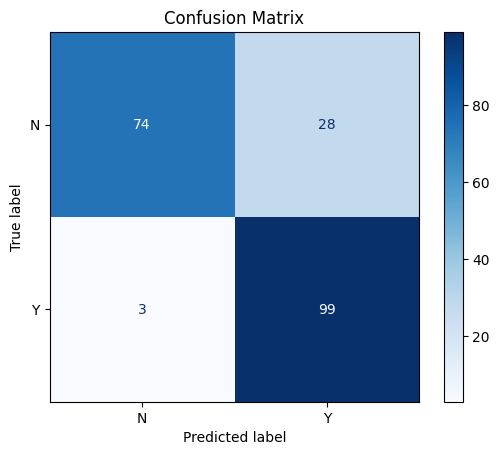

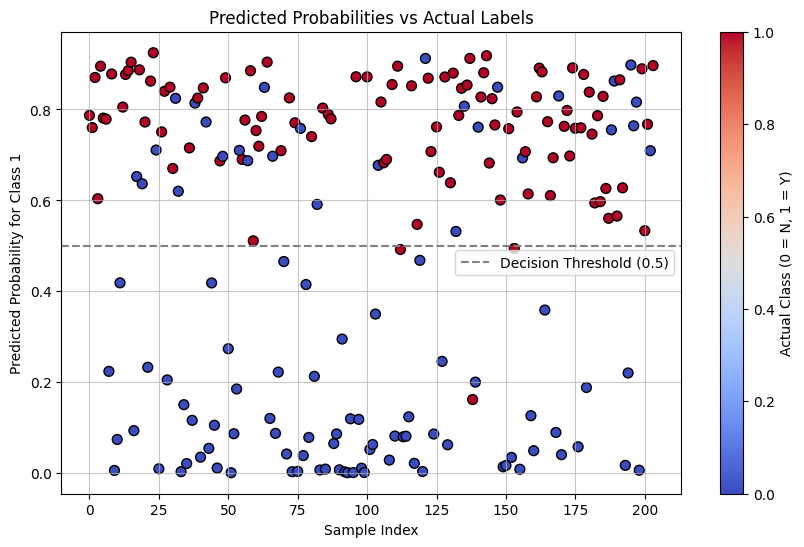

In [7]:
# Logistic Regression Model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred, y_pred_prob = model_pred(logistic_model, X_train, y_train, X_test)
accuracy_logistic = model_evaluation(logistic_model, y_test, y_pred, y_pred_prob)


For class N (Not Hired): **96.1** of the predicted N labels are correct.

For class Y (Hired): **77.96%** of the predicted Y labels are correct.

**Accuracy: The model achieves an accuracy of 84.80%, meaning it correctly classifies approximately 84.8% of all samples.**


The confusion matrix shows the following results:

True Negative: **74** samples were correctly classified as Not Hired.

False Negative: **28** samples with a true label of Not Hired were incorrectly classified as Hired.

True Positive: **99** samples were correctly classified as Hired.

False Positive: **3** samples with a true label of Hired were incorrectly classified as Not Hired.


Second chart illustrates the predicted probabilities for class 1 (Hired) versus the actual labels (class 0 or 1) from the logistic regression model.
Samples above this line are classified as class 1, and those below as class 0.

# Decision Tree

Accuracy: 0.7598039215686274
Classification Report
              precision    recall  f1-score     support
0              0.778947  0.725490  0.751269  102.000000
1              0.743119  0.794118  0.767773  102.000000
accuracy       0.759804  0.759804  0.759804    0.759804
macro avg      0.761033  0.759804  0.759521  204.000000
weighted avg   0.761033  0.759804  0.759521  204.000000


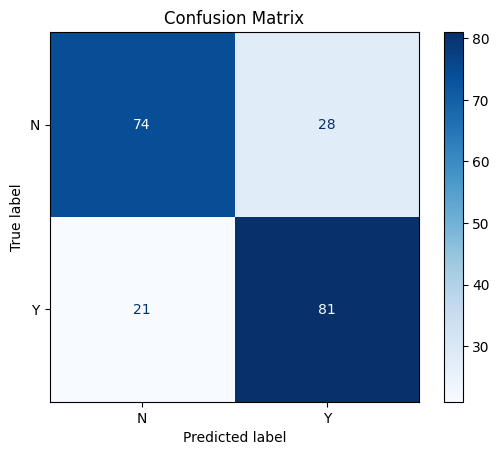

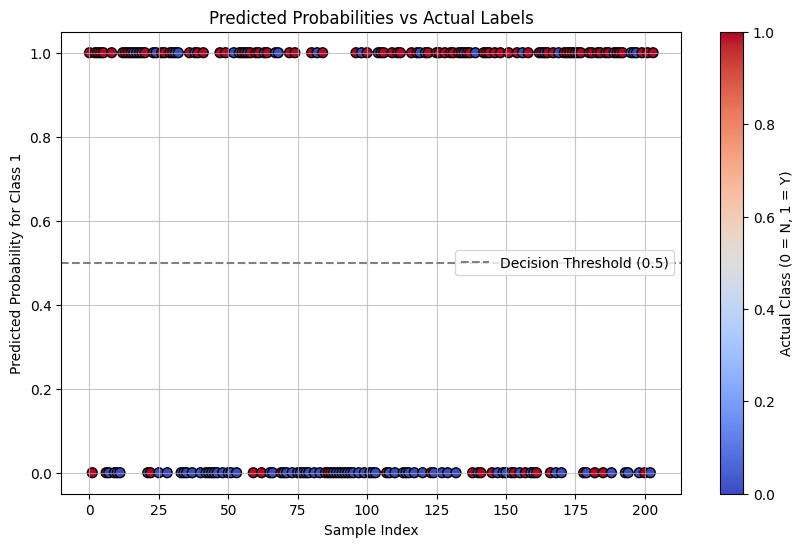

In [8]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred, y_pred_prob = model_pred(decision_tree, X_train, y_train, X_test)
accuracy_decision_tree = model_evaluation(decision_tree, y_test, y_pred, y_pred_prob)

For class N (Not Hired): **77.89** of the predicted N labels are correct.

For class Y (Hired): **74.31%** of the predicted Y labels are correct.

**Accuracy: The model achieves an accuracy of 75.98%.**



The confusion matrix shows the following results:

True Negative: **74** samples were correctly classified as Not Hired.

False Negative: **28** samples with a true label of Not Hired were incorrectly classified as Hired.

True Positive: **81** samples were correctly classified as Hired.

False Positive: **21** samples with a true label of Hired were incorrectly classified as Not Hired.


# K-Nearest Neighbors

Accuracy: 0.66
Accuracy: 0.60
Accuracy: 0.61
Accuracy: 0.59
Accuracy: 0.61
Accuracy: 0.61
Accuracy: 0.63
Accuracy: 0.63
Accuracy: 0.58
Accuracy: 0.59


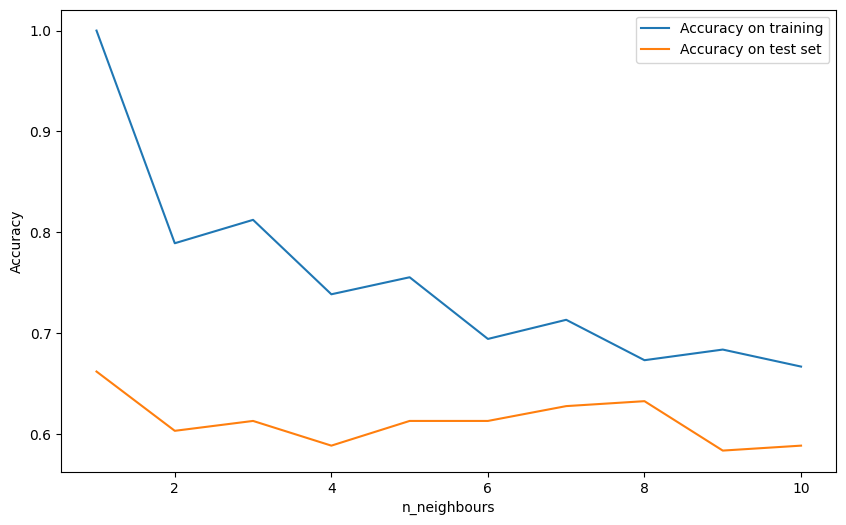

Accuracy: 0.5833333333333334
Classification Report
              precision    recall  f1-score     support
0              0.580952  0.598039  0.589372  102.000000
1              0.585859  0.568627  0.577114  102.000000
accuracy       0.583333  0.583333  0.583333    0.583333
macro avg      0.583405  0.583333  0.583243  204.000000
weighted avg   0.583405  0.583333  0.583243  204.000000


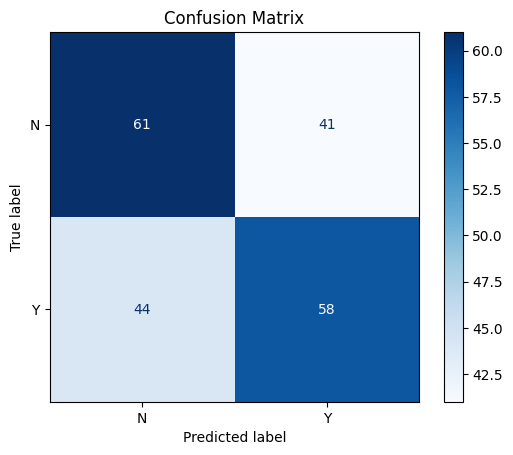

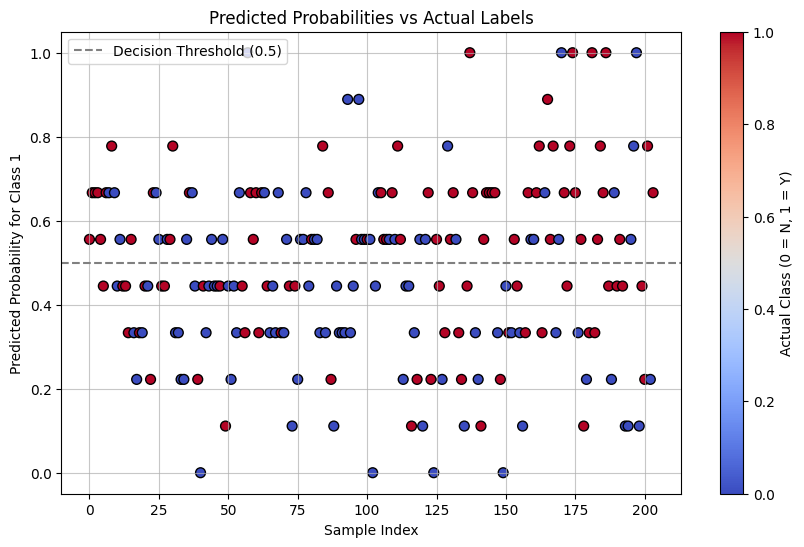

In [9]:
#Finding best values for n_neighbors
train_accuracies = []
test_accuracies = []
n_neighbors = list(range(1,11))
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("Accuracy: {:.2f}".format(knn.score(X_test, y_test)))

    train_accuracies.append(knn.score(X_train, y_train))
    test_accuracies.append(knn.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, train_accuracies, label="Accuracy on training")
plt.plot(n_neighbors, test_accuracies, label="Accuracy on test set")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbours")
plt.legend()
plt.show()

# KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred, y_pred_prob = model_pred(knn, X_train, y_train, X_test)

accuracy_knn = model_evaluation(knn, y_test, y_pred, y_pred_prob)

When n_neighbors is small the training accuracy is very high. This indicates overfitting, as the model memorizes the training data.
As n_neighbors increases, training accuracy decreases gradually because the model starts averaging over more neighbors, becoming less sensitive to individual data points. For this example, I've used 9 as optimal value for n_neighbors

**Accuracy: The model achieves an accuracy of 58.33%.**


For class N (Not Hired): **58.09%** of samples predicted as N were correct.

For class Y (Hired): **58.59%** of samples predicted as Y were correct.

True Negative: **61** samples were correctly classified as Not Hired.
False Negative: **41** samples with a true label of Not Hired were misclassified as Hired.

True Positive: **58** samples were correctly classified as Hired.

False Positive: **44** samples with a true label of Hired were misclassified as Not Hired.

# Naive Bayes Classifier

Accuracy: 0.7941176470588235
Classification Report
              precision    recall  f1-score     support
0              0.905405  0.656863  0.761364  102.000000
1              0.730769  0.931373  0.818966  102.000000
accuracy       0.794118  0.794118  0.794118    0.794118
macro avg      0.818087  0.794118  0.790165  204.000000
weighted avg   0.818087  0.794118  0.790165  204.000000


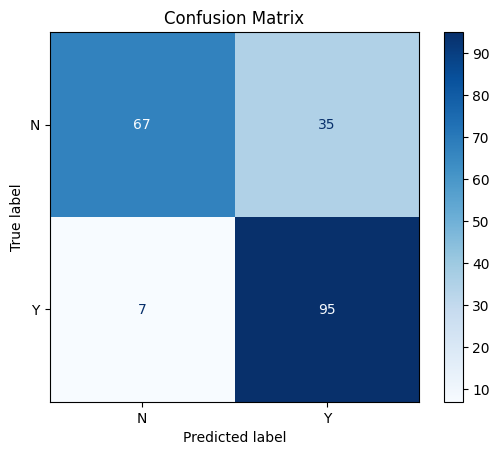

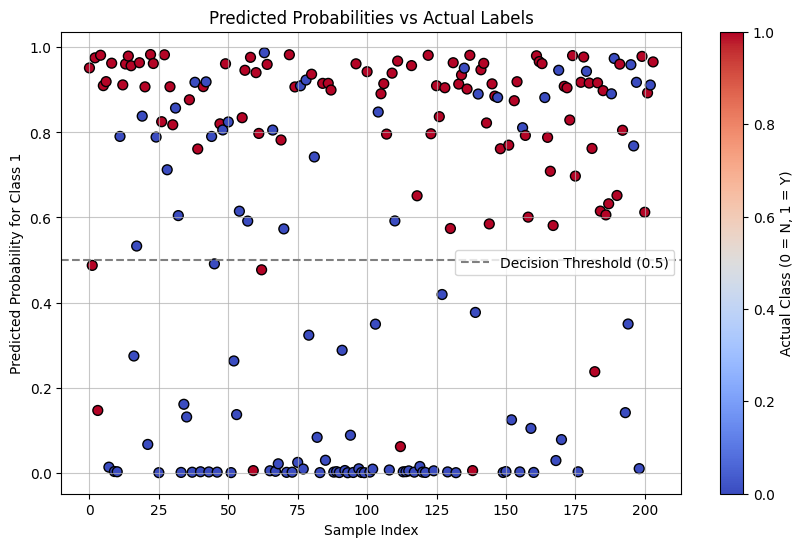

0.7941176470588235

In [10]:
# Naive Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred, y_pred_prob = model_pred(naive_bayes, X_train, y_train, X_test)

accuracy_naive_bayes = model_evaluation(naive_bayes, y_test, y_pred, y_pred_prob)


**Accuracy: The model achieves an accuracy of 79.41%.**


For class N (Not Hired):** 90.54%** of samples predicted as Not Hired were correct.

For class Y (Hired): **73.08%** of samples predicted as Hired were correct.

True Negative: **67** samples were correctly classified as Not Hired.

False Negative: **35** samples with a true label of Not Hired were misclassified as Hired.

True Positive: **95** samples were correctly classified as Hired.

False Positive: **7** samples with a true label of Hired were misclassified as Not Hired.


# Models Comparision

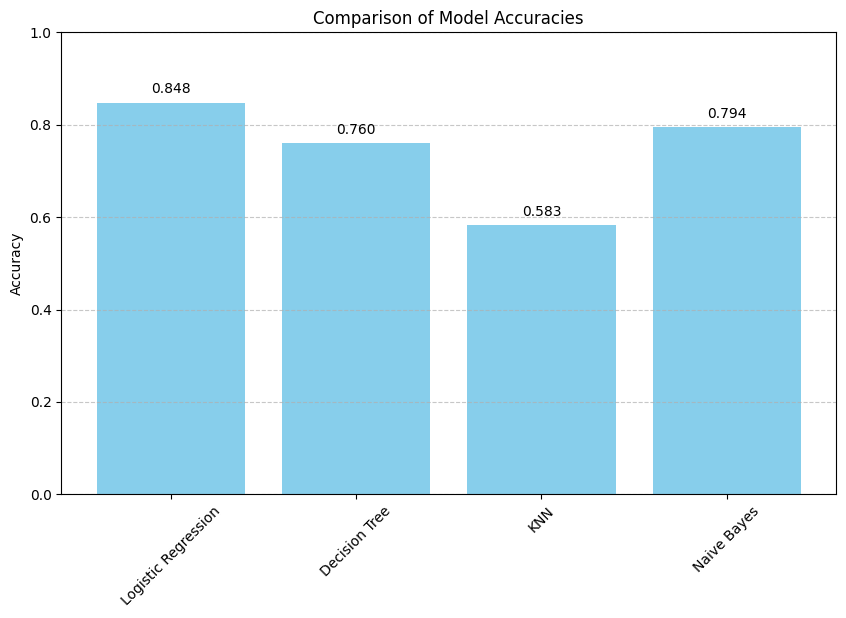

In [11]:
# Accuracy scores for each method
methods = ['Logistic Regression', 'Decision Tree', 'KNN', 'Naive Bayes']
accuracies = [accuracy_logistic, accuracy_decision_tree, accuracy_knn, accuracy_naive_bayes]


plt.figure(figsize=(10, 6))
plt.bar(methods, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Data Labels
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.3f}', ha='center', fontsize=10)

plt.show()

In summary, Logistic Regression and Naive Bayes clearly outperform KNN, providing more robust. These findings suggest that Logistic Regression and Naive Bayes are better suited to the structure of this dataset, while Decision Tree and KNN may require further optimization. To show more accurated scores of each model I've applied cross-validation below.

In [12]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
}

cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=4, scoring='accuracy')
    cv_results[name] = scores


cv_summary = {name: (np.mean(scores), np.std(scores)) for name, scores in cv_results.items()}
cv_summary_df = pd.DataFrame(cv_summary, index=["Mean Accuracy", "Std Dev"]).transpose()
cv_summary_df

,Mean Accuracy,Std Dev
Logistic Regression,0.803239,0.014586
Decision Tree,0.703924,0.025094
KNN,0.618657,0.011575
Naive Bayes,0.793076,0.017058


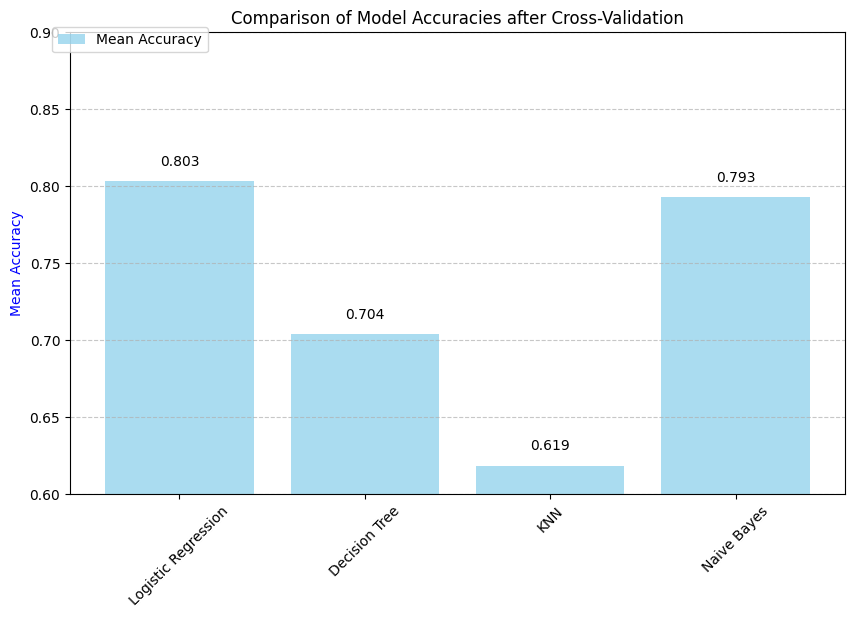

In [13]:
models = cv_summary_df.index
mean_accuracies = cv_summary_df['Mean Accuracy']
std_devs = cv_summary_df['Std Dev']

fig, ax1 = plt.subplots(figsize=(10, 6))

bars = ax1.bar(models, mean_accuracies, color='skyblue', alpha=0.7, label='Mean Accuracy')
ax1.set_ylabel('Mean Accuracy', color='blue')
ax1.set_ylim(0.6, 0.9)
for bar, accuracy in zip(bars, mean_accuracies):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"{accuracy:.3f}", ha='center', fontsize=10)

plt.title('Comparison of Model Accuracies after Cross-Validation')
plt.grid(axis='y', linestyle='--', alpha=0.7)
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.xticks(rotation=45)
plt.show()

After applying cross-validation, the accuracy of most models slightly decreased, reflecting a more realistic assessment of their generalization abilities.

**Logistic Regression**, which initially showed the highest accuracy, experienced a minor drop from 0.848 to 0.803, suggesting that its earlier performance might have been slightly optimistic due to the specific data split.


**Decision Tree** accuracy decreased more significantly, from 0.76 to 0.704, highlighting its susceptibility to overfitting.

**KNN** showed a similar pattern, with its accuracy increasing from 0.583 to 0.619.

**Naive Bayes** maintained relatively consistent accuracy, with only a negligible change from 0.794 to 0.793, demonstrating its robustness and generalization capabilities.

Overall, cross-validation provided a clearer picture of how these models perform on unseen data, revealing potential overfitting in some models. In summary, Logistic Regression would be the best choice from chosen methods in this Dataset.